In [1]:
from BinaryFileUnpack import BinaryFileUnpack
import numpy as np
import tkinter as tk
from tkinter import filedialog
from matplotlib import pyplot as plt

## Daily Calibration

In [2]:
def daily_cali(fp:str, atm_pres):
    cali_file = BinaryFileUnpack(fp)
    pres_cali = np.mean(cali_file.P, axis=-1) - atm_pres
    return pres_cali

def apply_cali(analysis:BinaryFileUnpack, pres_cali):
    Pres = np.zeros(analysis.P.shape)
    for i in range(analysis.num_sens):
        Pres[i] = analysis.P[i] - pres_cali[i]
    return Pres

pres_cali_1018 = daily_cali(r"C:\Users\akyap\OneDrive\Documents\Academics\Research\LDEO Geysers\files\10-18\dailycalibration_room1028p35-20241018-11-51-39.bin", 1.02835)
pres_cali_1018

array([0.25935998, 0.26513237, 0.2333192 , 0.24468075, 0.26088692,
       0.15818381])

## Initializing BinaryFileUnpack object
Select the <code>.bin</code> file to analyze.

In [3]:
# Select the file to analyze
interactive_select = True

if interactive_select:
    root = tk.Tk()
    root.withdraw()
    filepath = filedialog.askopenfilename()
else:
    # Specify filepath
    filepath = r'HotWaterCycles_heaters_on_steam_in-20221118-20-09-42.bin'
print(filepath)

C:/Users/akyap/OneDrive/Documents/Academics/Research/LDEO Geysers/files/10-18/TwoConstrictions_Cone_Stage4-20241018-15-57-57.bin


In [4]:
# Replace fp with necessary path
analysis = BinaryFileUnpack(filepath, sens_from_header=True)
num_sens = analysis.num_sens
analysis.header_info

{'File Version': 3,
 'Sampling Rate': 10000.0,
 'Device Count': 3,
 'Device ID': array([0, 1, 2]),
 'Serial Number Length': array([7, 7, 7], dtype=uint32),
 'Serial Number': array([[53, 57, 53, 52, 56, 55, 56],
        [53, 57, 53, 52, 56, 55, 54],
        [53, 57, 53, 52, 56, 55, 55]]),
 'Name Length': array([7, 7, 7], dtype=uint32),
 'Name': array([[ 76,  97,  98,  65, 109, 112,  49],
        [ 76,  97,  98,  65, 109, 112,  50],
        [ 76,  97,  98,  65, 109, 112,  51]]),
 'Number of Enabled Channels': array([4, 4, 4], dtype=uint32),
 'Channel Number': array([[1, 2, 3, 4],
        [1, 2, 3, 4],
        [1, 2, 3, 4]])}

Apply the Pressure Calibration Corresponding to the experiment day.

In [5]:
Pressure = apply_cali(analysis, pres_cali_1018)
Pressure

array([[1.25297139, 1.25249181, 1.25293861, ..., 1.05772422, 1.05656896,
        1.05775688],
       [1.24475759, 1.24392921, 1.24464851, ..., 1.05730337, 1.05803352,
        1.05759758],
       [1.20604238, 1.20523592, 1.20623859, ..., 1.05336734, 1.05323657,
        1.05331286],
       [1.05287219, 1.05258883, 1.05256701, ..., 1.03956438, 1.03990222,
        1.04007662],
       [1.16543935, 1.16511236, 1.16557013, ..., 1.04219185, 1.04257332,
        1.04207204],
       [1.09689522, 1.09702599, 1.09757102, ..., 1.03346229, 1.03427971,
        1.03325522]])

### (Optional) Simple Spectral Analysis

In [6]:
# Pressure
Pxx = analysis.spectra(analysis.P)
# Temperature
Txx = analysis.spectra(analysis.T)

## Graphing in Matplotlib (static)

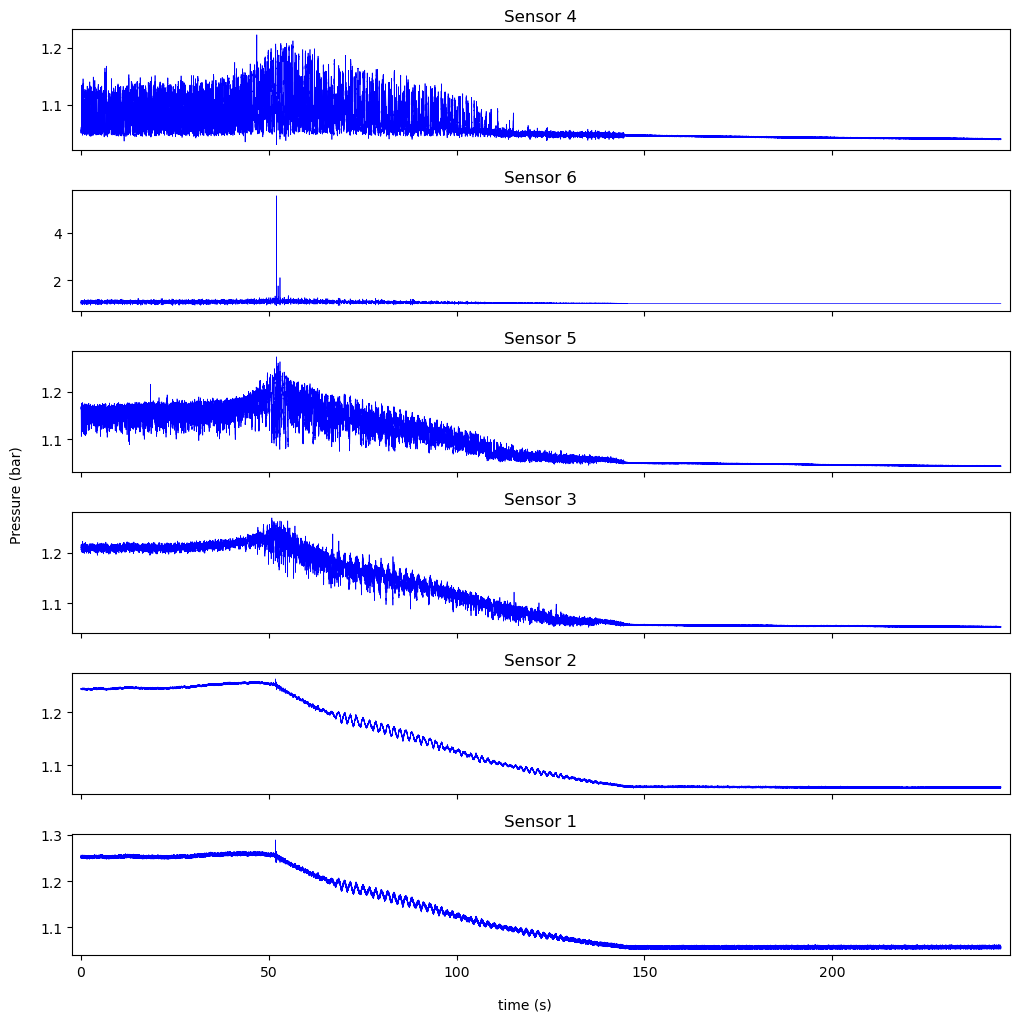

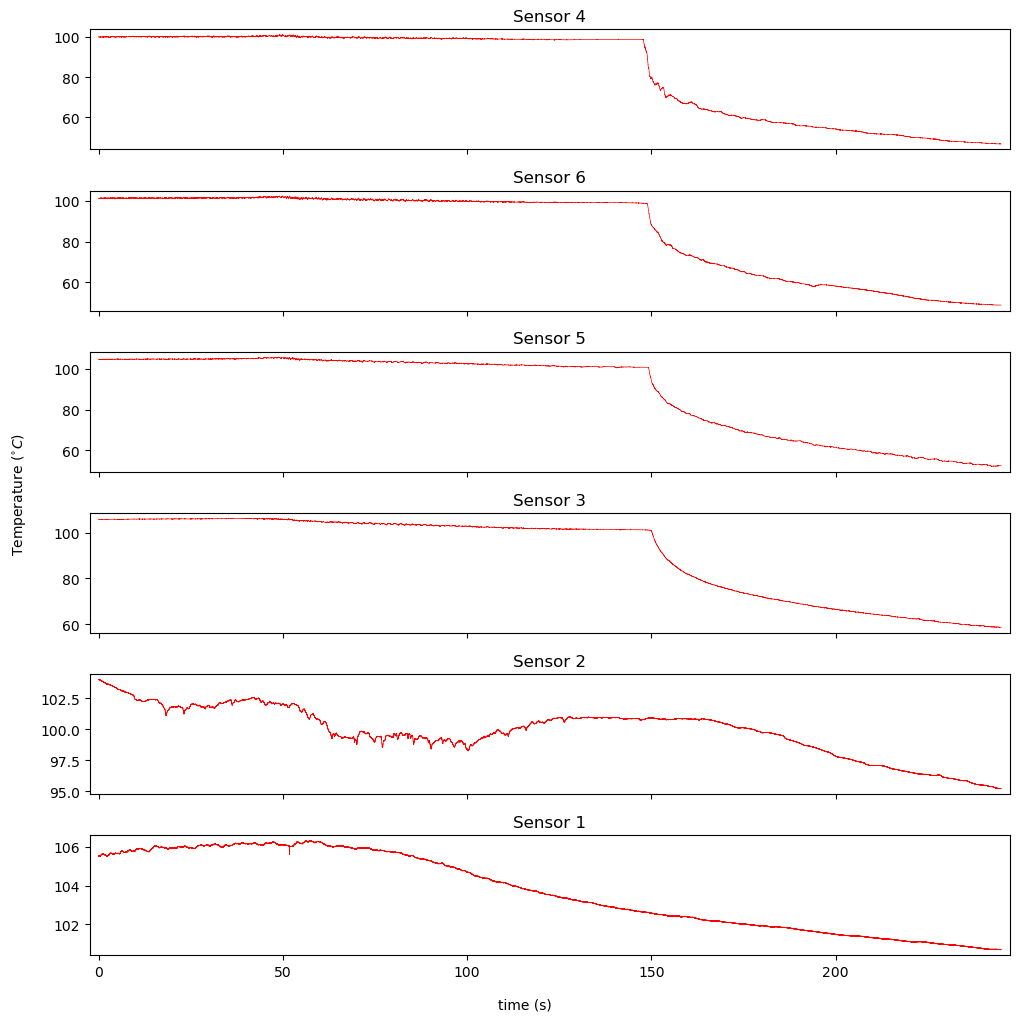

In [7]:
%matplotlib inline
sta = 0; end = len(analysis.time)/analysis.fs
times = analysis.getTimeRange(sta, end)
# Pressure
analysis.plot_static(analysis.time, Pressure, "time (s)", "Pressure (bar)", plots_shape=(num_sens, 1), color='b', times=times, ordering=[3, 5, 4, 2, 1, 0])
# Temperature
analysis.plot_static(analysis.time, analysis.T, "time (s)", r"Temperature ($^{\circ}C$)", plots_shape=(num_sens, 1), color='r', times=times, ordering=[3, 5, 4, 2, 1, 0])
# PT
# analysis.plot_static(analysis.time, analysis.P, "time (s)", "Pressure (bar)", plots_shape=(num_sens, 1), times=times, y2 = analysis.T, ordering=[3, 5, 4, 2, 1, 0], y2_label=r"Temperature ($^{\circ}C$)", sharex=True)

# Spectral Analysis
# analysis.plot_static(Pxx[0], Pxx[1], "Frequency (Hz)", "Power (dB)", plots_shape=(num_sens//2, 2), color='b', x_axis_type='log')
# analysis.plot_static(Txx[0], Txx[1], "Frequency (Hz)", "Power (dB)", plots_shape=(num_sens//2, 2), color='r', x_axis_type='log')

Plotting Pressure against Temperature Data for Hot Water Eruption Cycles

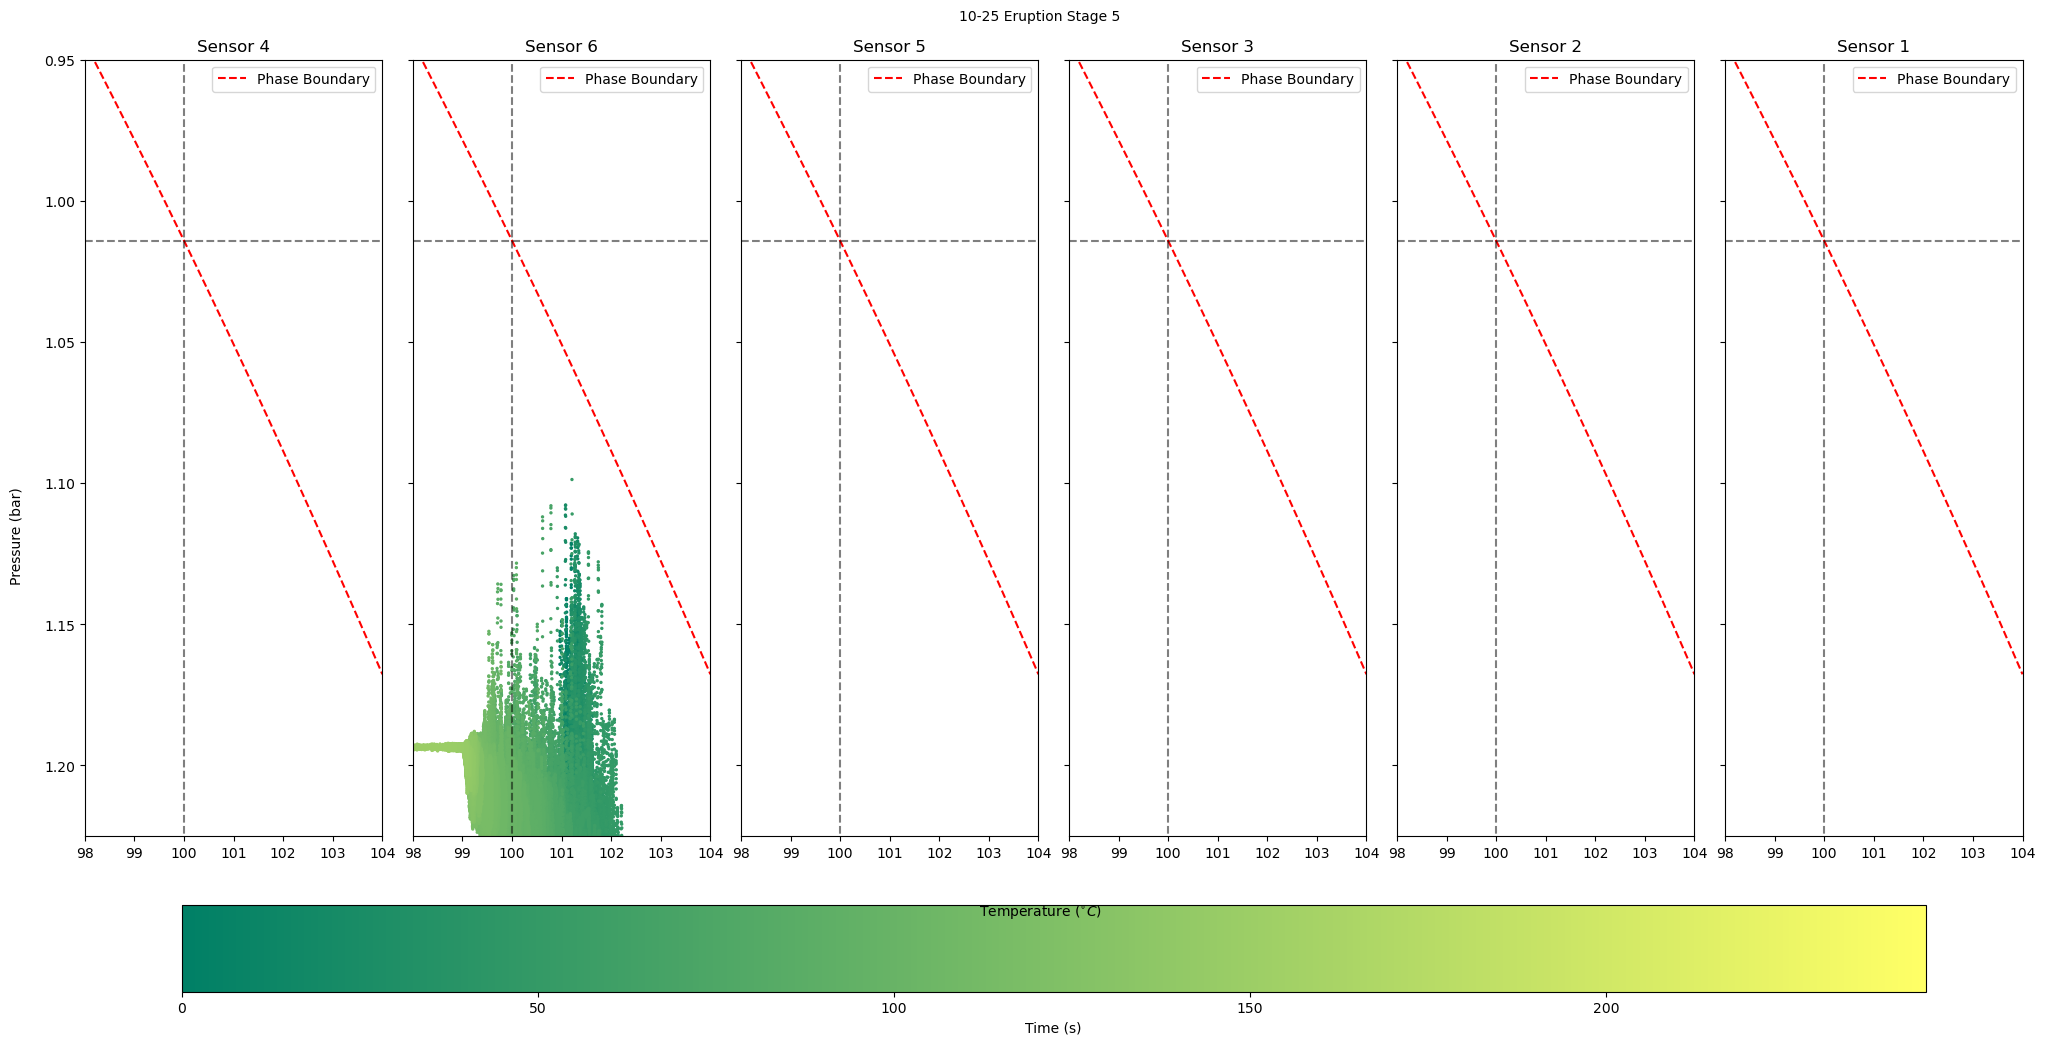

In [8]:
analysis.plot_eruption_PT(show_phase_boundaries=True, title=f"10-25 Eruption Stage 5", ordering=[3, 5, 4, 2, 1, 0], savefig=True, times=times)